In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('spam.csv', encoding='latin-1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
7555,ham,"Subject: enron / hpl actuals for sept . 19 , 2...",NaN,NaN,NaN
6198,ham,"Good afternoon, I wanted to follow up on our c...",NaN,NaN,NaN
489,ham,I think i've fixed it can you send a test mess...,NaN,NaN,NaN
4334,ham,"Now u sound like manky scouse boy steve,like! ...",NaN,NaN,NaN
313,ham,"Hi the way I was with u 2day, is the normal wa...",NaN,NaN,NaN


In [2]:
df.shape

(11623, 5)

# Work Flow

1. Data Cleaning
2. EDA (Exploratory Data Analysis)
3. Text Preprosessing (Vectorization, Stemming, Removing stopwords etc)
4. Model Building
5. Evaluation of the model
6. Improvement of the model depending on evaluation
7. Making a website for this model
8. Deploy this website on Heroku

## Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11623 entries, 0 to 11622
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          11623 non-null  object
 1   v2          11623 non-null  object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 454.2+ KB


In [2]:
# drop last three columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [3]:
# renaming columns
df.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)
df.head(5)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# labelling the labels (target variable)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])         # ham= 0, spam = 1

df.head(5)

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df['label'].value_counts()

label
0    8705
1    2918
Name: count, dtype: int64

In [8]:
# checking for missing values
df.isnull().sum()

label      0
message    0
dtype: int64

In [6]:
# checkfor duplicates
df.duplicated().sum()

715

In [7]:
# remove the 403 duplicates
# this method is to remove duplicate rows from df, keeping only the first occurrence of each duplicate.
df = df.drop_duplicates(keep='first')

In [8]:
df.duplicated().sum()

0

In [12]:
df.shape

(10908, 2)

In [13]:
df['label'].value_counts()

label
0    8231
1    2677
Name: count, dtype: int64

## EDA

In [14]:
df['label'].value_counts() # spam is less than ham, which is not good. Data is imbalanced.

label
0    8231
1    2677
Name: count, dtype: int64

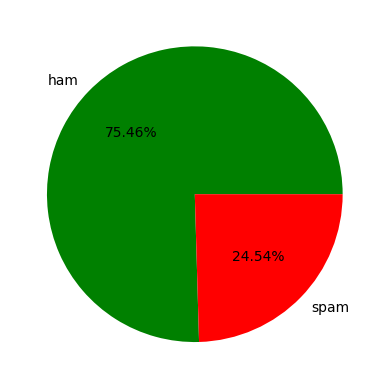

In [25]:
# visualizing this using pie chart
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f%%', colors=['green', 'red'])
plt.show()

In [9]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to C:\Users\SUBHANKAR
[nltk_data]     BISWAS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

Here we shall create 3 new columns

In [10]:
# a new column having numbers of chars in the message
df['num_chars'] = df['message'].apply(len)
df.head(5)

,label,message,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [11]:
# number of words in the message
df['num_words'] = df['message'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head(5)

,label,message,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [12]:
# number of sentences in the message
df['num_sentences'] = df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head(5)

,label,message,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [13]:
#getting insignts based on ham
df[df['label'] == 0][['num_chars', 'num_words', 'num_sentences']].describe()

,num_chars,num_words,num_sentences
count,8231.000000,8231.000000,8231.000000
mean,488.910946,112.744260,6.268983
std,1037.589006,246.154114,17.386747
min,2.000000,1.000000,1.000000
25%,47.000000,12.000000,1.000000
50%,107.000000,26.000000,3.000000
75%,454.000000,110.000000,6.000000
max,32258.000000,8863.000000,1204.000000


In [21]:
#getting insignts based on spam
df[df['label'] == 1][['num_chars', 'num_words', 'num_sentences']].describe()

,num_chars,num_words,num_sentences
count,2677.000000,2677.000000,2677.000000
mean,782.125887,149.843855,11.100112
std,1465.520785,278.880480,25.538382
min,11.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,266.000000,52.000000,4.000000
75%,795.000000,162.000000,12.000000
max,22073.000000,3963.000000,693.000000


In [23]:
# so we can see that spam messages are longer than ham messages, on average.
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.histplot(df[df['label'] == 0]['num_chars'], color='green', label='ham', kde=True)
sns.histplot(df[df['label'] == 1]['num_chars'], color='red', label='spam', kde=True)

NameError: name 'plt' is not defined

<Axes: xlabel='num_words', ylabel='Count'>

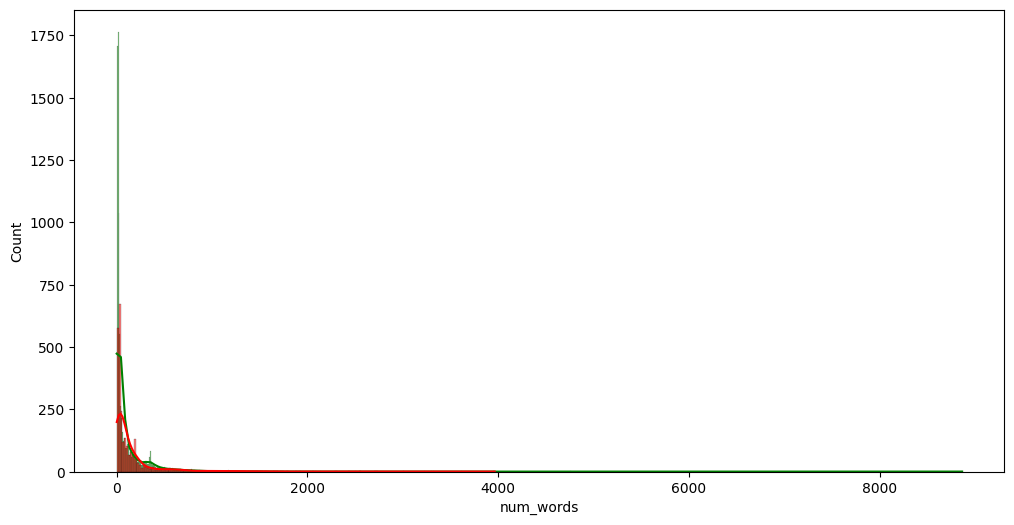

In [23]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['label'] == 0]['num_words'], color='green', label='ham', kde=True)
sns.histplot(df[df['label'] == 1]['num_words'], color='red', label='spam', kde=True)

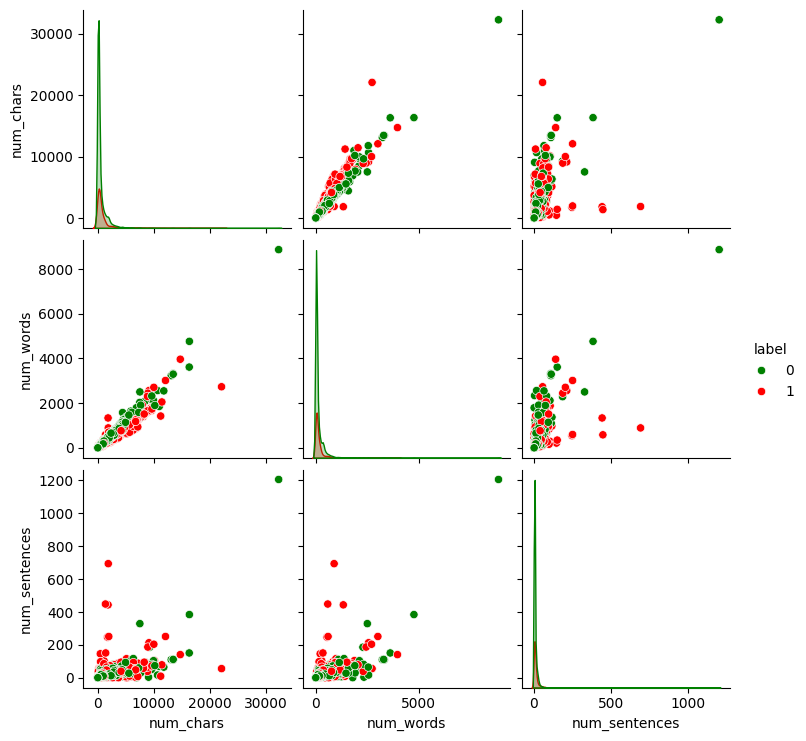

In [24]:
sns.pairplot(df, hue='label', palette=['green', 'red'])

<Axes: >

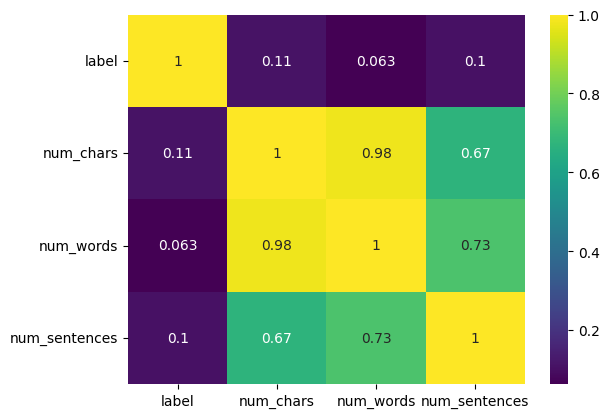

In [25]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis')

## Text Preprocessing

1. Lower Case
2. Tokenization
3. Removing Special Chars
4. Removing stop words and puntuations
5. Stemming or lemmatization (removing wrods of similar meaning- play, playing, placed ==> play)

In [14]:
# removing punctuations and stopwords
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [15]:
def transform_text(text):
    text = text.lower()  # convert to lowercase
    text = nltk.word_tokenize(text)  # tokenize the text eg- ['hello', 'how', 'are', 'you']
    
    y = []
    # stopwords and puntuation removal
    for i in text:
        # if i not in stopwords.words('english') and i not in string.punctuation:
        if i not in string.punctuation:
            # if the word is not a stopword and not a punctuation, keep it
            y.append(i)
            
    text = y[:]
    y.clear()  # clear the list for reuse
    for i in text:
        if i.isalnum():
            y.append(i)  # keep only alphanumeric characters
            
    text = y[:]
    y.clear()
    # lemmatization
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [16]:
transform_text("There is a huge discount on the product, don't miss it!")

'there is a huge discount on the product do miss it'

In [29]:
df['message'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [30]:
transform_text(df['message'][10])

'i gon na be home soon and i do want to talk about thi stuff anymor tonight k i cri enough today'

In [17]:
df['cleaned_message'] = df['message'].apply(transform_text)

In [18]:
df.head(5)

,label,message,num_chars,num_words,num_sentences,cleaned_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so earli hor u c alreadi then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i do think he goe to usf he live around he...


In [19]:
# top 50 words in spam messages in a list
spam_corpus = []
for message in df[df['label'] == 1]['cleaned_message'].tolist():
    for word in message.split():
        spam_corpus.append(word)


In [20]:
len(spam_corpus)

318747

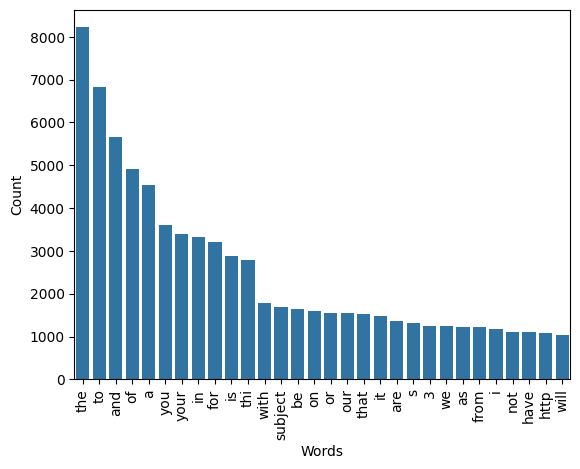

<Figure size 2000x800 with 0 Axes>

In [26]:
from collections import Counter
spam_counter = Counter(spam_corpus)
spam_words_df = pd.DataFrame(spam_counter.most_common(30))
sns.barplot(x=spam_words_df[0], y=spam_words_df[1])
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Count')
figsize=(20, 8)
plt.figure(figsize=figsize)
plt.show()

In [27]:
pd.DataFrame(spam_counter.most_common(30)).head(5)

,0,1
0,the,8220
1,to,6818
2,and,5648
3,of,4922
4,a,4544


## Model Building and Evaluation

### 1. Naive Bayes Classifier

In [28]:
# Here out input (cleaned _message) is in text format, we need to convert it into a numerical format. That is, we need to vectorize the text data.
# Using BagOfWords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=4000) #parameter tuning using max_features to limit the number of features to 3000
# X = cv.fit_transform(df['cleaned_message']).toarray()  # convert to dense array from sparse matrix
X = tfidf.fit_transform(df['cleaned_message']).toarray()  # convert to dense array from sparse matrix

In [29]:
X.shape # (5169, 6708)  # 5169 messages, 6708 unique words

(10908, 4000)

In [39]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
X.shape

(10908, 4000)

In [40]:
# Scaling X (model performance improvement)
# later we saw no substantial difference in performance with and without scaling, so we commented it out.
# from sklearn.preprocessing import MinMaxScaler
# # we have used MinMaxScaler not StandardScaler as StandardScalar gives -ve values which NB don't take.
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [30]:
y = df['label'].values  # target variable
y

array([0, 0, 1, ..., 0, 0, 0])

In [31]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [43]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score

Training the models

In [45]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print("GaussianNB Accuracy:", accuracy_score(y_test, y_pred1))
print("GaussianNB Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print("GaussianNB Classification Report:\n", classification_report(y_test, y_pred1))
print("GaussianNB Precision:", precision_score(y_test, y_pred1))


GaussianNB Accuracy: 0.7836846929422548
GaussianNB Confusion Matrix:
 [[1199  448]
 [  24  511]]
GaussianNB Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.73      0.84      1647
           1       0.53      0.96      0.68       535

    accuracy                           0.78      2182
   macro avg       0.76      0.84      0.76      2182
weighted avg       0.87      0.78      0.80      2182

GaussianNB Precision: 0.5328467153284672


In [46]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print("MultinominalNB Accuracy:", accuracy_score(y_test, y_pred2))
print("MultinominalNB Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("MultinominalNB Classification Report:\n", classification_report(y_test, y_pred2))
print("MultinominalNB Precision:", precision_score(y_test, y_pred2))

MultinominalNB Accuracy: 0.9450045829514208
MultinominalNB Confusion Matrix:
 [[1614   33]
 [  87  448]]
MultinominalNB Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      1647
           1       0.93      0.84      0.88       535

    accuracy                           0.95      2182
   macro avg       0.94      0.91      0.92      2182
weighted avg       0.94      0.95      0.94      2182

MultinominalNB Precision: 0.9313929313929314


In [47]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print("BernouliNB Accuracy:", accuracy_score(y_test, y_pred3))
print("BernouliNB Confusion Matrix:\n", confusion_matrix(y_test, y_pred3))
print("BernouliNB Classification Report:\n", classification_report(y_test, y_pred3))
print("BernouliNB Precision:", precision_score(y_test, y_pred3))

BernouliNB Accuracy: 0.8767186067827681
BernouliNB Confusion Matrix:
 [[1587   60]
 [ 209  326]]
BernouliNB Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1647
           1       0.84      0.61      0.71       535

    accuracy                           0.88      2182
   macro avg       0.86      0.79      0.81      2182
weighted avg       0.87      0.88      0.87      2182

BernouliNB Precision: 0.844559585492228


So we have choosen mnb with tfidf.

In [52]:
# using KNN algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)  # n_neighbors can be tuned
knn.fit(X_train, y_train)
y_pred4 = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred4))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred4))
print("KNN Classification Report:\n", classification_report(y_test, y_pred4))
print("KNN Precision:", precision_score(y_test, y_pred4))

KNN Accuracy: 0.8473877176901925
KNN Confusion Matrix:
 [[1645    2]
 [ 331  204]]
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91      1647
           1       0.99      0.38      0.55       535

    accuracy                           0.85      2182
   macro avg       0.91      0.69      0.73      2182
weighted avg       0.87      0.85      0.82      2182

KNN Precision: 0.9902912621359223


In [53]:
# using svm
from sklearn.svm import SVC
svm = SVC(kernel='linear')  # kernel can be tuned
# tune kernel to 'rbf' or 'poly' for better performance
svm.fit(X_train, y_train)
y_pred5 = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred5))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred5))
print("SVM Classification Report:\n", classification_report(y_test, y_pred5))
print("SVM Precision:", precision_score(y_test, y_pred5))

SVM Accuracy: 0.9770852428964253
SVM Confusion Matrix:
 [[1630   17]
 [  33  502]]
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1647
           1       0.97      0.94      0.95       535

    accuracy                           0.98      2182
   macro avg       0.97      0.96      0.97      2182
weighted avg       0.98      0.98      0.98      2182

SVM Precision: 0.9672447013487476


In [56]:
# using svm
from sklearn.svm import SVC
svm02 = SVC(kernel='rbf')  # kernel can be tuned
# tune kernel to 'rbf' or 'poly' for better performance
svm02.fit(X_train, y_train)
y_pred9 = svm02.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred9))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred9))
print("SVM Classification Report:\n", classification_report(y_test, y_pred9))
print("SVM Precision:", precision_score(y_test, y_pred9))

SVM Accuracy: 0.9775435380384968
SVM Confusion Matrix:
 [[1636   11]
 [  38  497]]
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1647
           1       0.98      0.93      0.95       535

    accuracy                           0.98      2182
   macro avg       0.98      0.96      0.97      2182
weighted avg       0.98      0.98      0.98      2182

SVM Precision: 0.9783464566929134


In [57]:
# using svm
from sklearn.svm import SVC
svm03 = SVC(kernel='poly')  # kernel can be tuned
# tune kernel to 'rbf' or 'poly' for better performance
svm03.fit(X_train, y_train)
y_pred10 = svm03.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred10))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred10))
print("SVM Classification Report:\n", classification_report(y_test, y_pred10))
print("SVM Precision:", precision_score(y_test, y_pred10))

SVM Accuracy: 0.9097158570119157
SVM Confusion Matrix:
 [[1644    3]
 [ 194  341]]
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      1647
           1       0.99      0.64      0.78       535

    accuracy                           0.91      2182
   macro avg       0.94      0.82      0.86      2182
weighted avg       0.92      0.91      0.90      2182

SVM Precision: 0.9912790697674418


In [54]:
# use decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred6 = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred6))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred6))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred6))
print("Decision Tree Precision:", precision_score(y_test, y_pred6))

Decision Tree Accuracy: 0.9175068744271311
Decision Tree Confusion Matrix:
 [[1566   81]
 [  99  436]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95      1647
           1       0.84      0.81      0.83       535

    accuracy                           0.92      2182
   macro avg       0.89      0.88      0.89      2182
weighted avg       0.92      0.92      0.92      2182

Decision Tree Precision: 0.8433268858800773


In [66]:
# use Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # n_estimators can be tuned
rf.fit(X_train, y_train)
y_pred7 = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred7))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred7))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred7))
print("Random Forest Precision:", precision_score(y_test, y_pred7))

Random Forest Accuracy: 0.9697525206232814
Random Forest Confusion Matrix:
 [[1639    8]
 [  58  477]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1647
           1       0.98      0.89      0.94       535

    accuracy                           0.97      2182
   macro avg       0.97      0.94      0.96      2182
weighted avg       0.97      0.97      0.97      2182

Random Forest Precision: 0.9835051546391752


In [44]:
# Apply CNN
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, BatchNormalization, Dropout

In [45]:
X_train_cnn = X_train[..., np.newaxis]
X_test_cnn = X_test[..., np.newaxis]

model = Sequential()

model.add(Conv1D(32, kernel_size=(3), padding='valid', activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2), padding = 'valid'))

model.add(Conv1D(64, kernel_size=(3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2), padding = 'valid'))

model.add(Conv1D(128, kernel_size=(3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2), padding = 'valid'))

model.add(Conv1D(256, kernel_size=(3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2), padding = 'valid'))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [46]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)               │ (None, 3998, 32)       │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 3998, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 1999, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 1997, 64)       │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1997, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 998, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 996, 128)       │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 996, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 498, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 496, 256)       │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 496, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 248, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 63488)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │    16,253,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,425,921 (62.66 MB)

 Trainable params: 16,424,961 (62.66 MB)

 Non-trainable params: 960 (3.75 KB)

In [47]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
y_prob1d = model.predict(X_test_cnn)
y_pred1d = (y_prob1d > 0.5).astype(int).flatten()
print("CNN1D Accuracy:", accuracy_score(y_test, y_pred1d))
print("CNN1D Confusion Matrix:\n", confusion_matrix(y_test, y_pred1d))
print("CNN1D Classification Report:\n", classification_report(y_test, y_pred1d))
print("CNN1D Precision:", precision_score(y_test, y_pred1d))

69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step
CNN1D Accuracy: 0.967461044912924
CNN1D Confusion Matrix:
 [[1615   32]
 [  39  496]]
CNN1D Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1647
           1       0.94      0.93      0.93       535

    accuracy                           0.97      2182
   macro avg       0.96      0.95      0.96      2182
weighted avg       0.97      0.97      0.97      2182

CNN1D Precision: 0.9393939393939394


In [49]:
# import matplotlib.pyplot as plt

# # Plot Accuracy
# plt.figure()
# plt.plot(history.history['accuracy'], label='train_acc')
# plt.plot(history.history['val_accuracy'], label='val_acc')
# plt.title('Model Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

# # Plot Loss
# plt.figure()
# plt.plot(history.history['loss'], label='train_loss')
# plt.plot(history.history['val_loss'], label='val_loss')
# plt.title('Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()


In [50]:
# use XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')  # use_label_encoder is deprecated
xgb.fit(X_train, y_train)
y_pred8 = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred8))
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred8))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred8))
print("XGBoost Precision:", precision_score(y_test, y_pred8))

C:\Users\SUBHANKAR BISWAS\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [23:34:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.9660861594867094
XGBoost Confusion Matrix:
 [[1626   21]
 [  53  482]]
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1647
           1       0.96      0.90      0.93       535

    accuracy                           0.97      2182
   macro avg       0.96      0.94      0.95      2182
weighted avg       0.97      0.97      0.97      2182

XGBoost Precision: 0.9582504970178927


### Save the model RandomForest

In [67]:
import pickle
# Saving the vectorizer and model
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(rf, open('model.pkl', 'wb'))